# Plot convergence curves

In [1]:
import matplotlib as mpb

# show all the matplotlib backends 
#mpb.rcsetup.all_backends 

# force matplotlib to use the 'Qt5Agg' backend 
#mpb.use(arg='Qt5Agg', force=True)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import scipy.stats as sp
import os

from fatiando.gravmag import polyprism
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from fatiando.vis import mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

/home/leonardo/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [3]:
import sys
sys.path.insert(0, '../../code')

import mag_polyprism_functions as mfun

In [4]:
mypath = 'tfa_inversion/upward_multiple_int_min3_int_max6_z0_min-900_z0_max-750_r1500_dz700_V30_L8Feb-14-2020/'

In [5]:
with open(mypath+'inversion.pickle') as w:
        di = pickle.load(w)

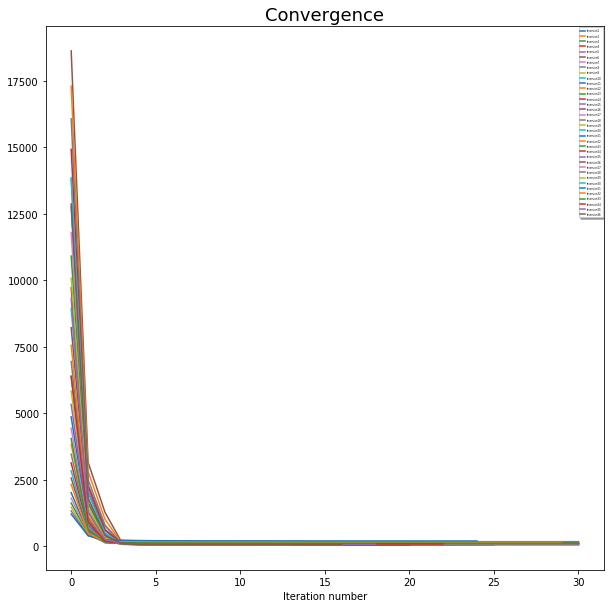

In [6]:
plt.figure(figsize=(10,10))
plt.title('Convergence', fontsize = 18)
plt.xlabel('Iteration number')
for i, phi in enumerate(di['results']):
    plt.plot(phi[3], label='inversion%d' % (i+1))
plt.legend(loc=0, fontsize=2.5, shadow=bool, framealpha=1)

plt.savefig(mypath+'_tfa_convergence.png', dpi=300)
plt.show()

In [7]:
z0 = di['z0']
intensity = di['intensity']
z0_plot, int_plot = np.meshgrid(z0, intensity)
z0_plot = z0_plot.ravel()
int_plot = int_plot.ravel()
n = z0.size
m = intensity.size
N = di['x'].size

In [8]:
matrix_gamma = np.zeros((n,m))
for i in range(n):
    for j in range(m):
        matrix_gamma[i, j] = di['results'][i*n+j][3][-1]

In [9]:
matrix_phi = np.zeros((n,m))
for i in range(n):
    for j in range(m):
        matrix_phi[i, j] = np.linalg.norm(di['results'][i*n+j][6][-1], 2)**2./N

In [10]:
mindex = np.argwhere(matrix_gamma<50.)
mindex

array([[0, 3],
       [1, 4],
       [1, 5]])

In [11]:
di['regularization']

array([1.e-03, 1.e-04, 0.e+00, 0.e+00, 1.e-03, 1.e-06, 1.e-05])

In [12]:
dots_z0 = []
dots_int = []
for re in mindex:
    print re[0]*10 + re[1]
    print matrix_gamma[re[0], re[1]]
    dots_int.append(np.linalg.norm(di['results'][re[0]*n + re[1]][2][0].props['magnetization']))
    dots_z0.append(di['results'][re[0]*n + re[1]][2][0].z1)

3
49.62746574434148
14
49.717828887589995
15
48.22696690898226


In [13]:
misdex = np.argwhere(matrix_phi<42.5)
misdex

array([[0, 3],
       [1, 4],
       [1, 5],
       [2, 5]])

In [14]:
for re in misdex:
    print re[0]*10 + re[1]
    print matrix_phi[re[0], re[1]]

3
42.17217132038887
14
41.60750079137411
15
37.91058170794909
25
42.2268900668607


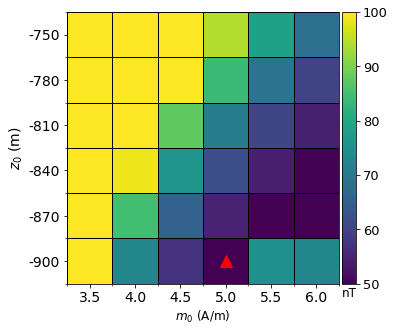

In [15]:
fig, ax = fig, ax = plt.subplots(1,1)
fig.set_size_inches(6,5)
w = 3.
img = ax.imshow(matrix_gamma, vmin=50, vmax=100, origin='lower',extent=[0,w,0,w])
img.axes.tick_params(labelsize=14)
plt.ylabel('$z_0$ (m)', fontsize=14)
plt.xlabel('$m_0$ (A/m)', fontsize=12)
plt.plot(1.75, .25, '^r', markersize=12)
#plt.plot(2.75, .75, 'Dc', markersize=12, linewidth=2)
x_label_list = []
y_label_list = []
for xl, yl in zip(intensity,z0):
    x_label_list.append(str(xl))
    y_label_list.append(str(yl)[:-2])
ax.set_xticks(np.linspace(w/(2.*n), w - w/(2.*n), n))
ax.set_yticks(np.linspace(w/(2.*m), w - w/(2.*m), m))
ax.set_xticklabels(x_label_list)
ax.set_yticklabels(y_label_list)
# Minor ticks
ax.set_xticks(np.linspace(0, w, n+1), minor=True)
ax.set_yticks(np.linspace(0, w, m+1), minor=True)
ax.grid(which='minor', color='k', linewidth=1)
clb = plt.colorbar(img, pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT', pad=-285)
clb.ax.tick_params(labelsize=13)
plt.savefig(mypath+'goal_func_grid.png', dpi=300, bbox_inches='tight')
plt.show()

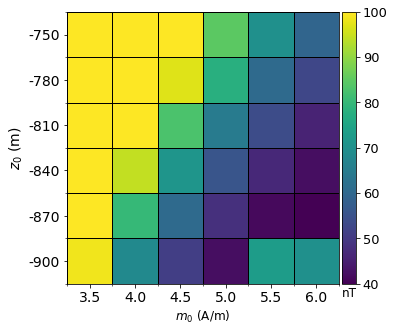

In [16]:
fig, ax = fig, ax = plt.subplots(1,1)
fig.set_size_inches(6,5)
img = ax.imshow(matrix_phi, vmin=40, vmax=100, origin='lower',extent=[0,1,0,1], aspect='equal')
img.axes.tick_params(labelsize=14)
plt.ylabel('$z_0$ (m)', fontsize=14)
plt.xlabel('$m_0$ (A/m)', fontsize=12)
x_label_list = []
y_label_list = []
for xl, yl in zip(intensity,z0):
    x_label_list.append(str(xl))
    y_label_list.append(str(yl)[:-2])
ax.set_xticks(np.linspace(1./(2.*n), 1 - 1./(2.*n), n))
ax.set_yticks(np.linspace(1./(2.*m), 1 - 1./(2.*m), m))
ax.set_xticklabels(x_label_list)
ax.set_yticklabels(y_label_list)
# Minor ticks
ax.set_xticks(np.linspace(0, 1, n+1), minor=True)
ax.set_yticks(np.linspace(0, 1, m+1), minor=True)
clb = plt.colorbar(img, pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT', pad=-285)
clb.ax.tick_params(labelsize=13)
ax.grid(which='minor', color='k', linewidth=1)
plt.show()

# Inversion 3 (red triangle)

In [17]:
x = di['x']/1000.
y = di['y']/1000.
z = di['z']/1000.

for i in range(len(di['results'][3][2])):
    di['results'][3][2][i].x /= 1000.
    di['results'][3][2][i].y /= 1000.
    di['results'][3][2][i].z1 /= 1000.
    di['results'][3][2][i].z2 /= 1000.
    di['results'][3][4][0][i].x /= 1000.
    di['results'][3][4][0][i].y /= 1000.
    di['results'][3][4][0][i].z1 /= 1000.
    di['results'][3][4][0][i].z2 /= 1000.

In [18]:
verts3 = mfun.plot_prisms(di['results'][3][2])
verts_initial3 = mfun.plot_prisms(di['results'][3][4][0])

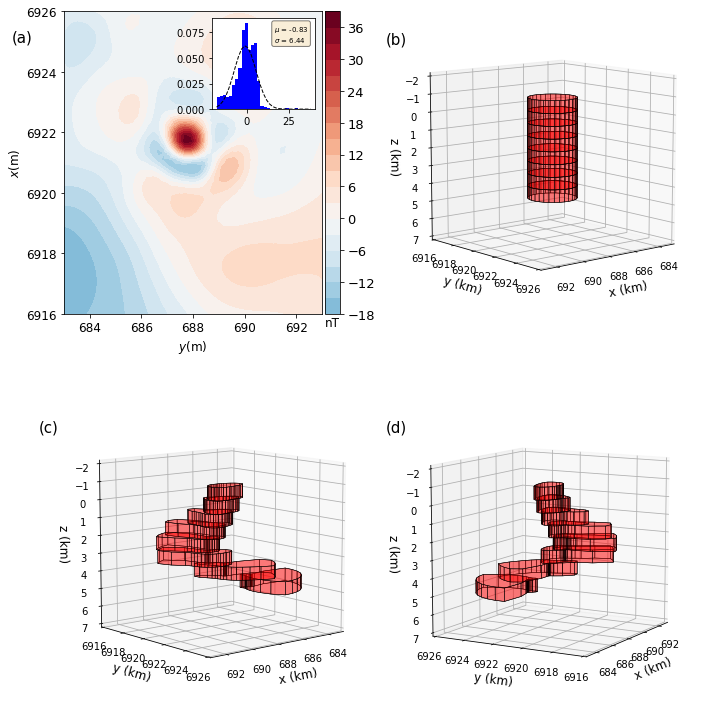

In [29]:
plt.figure(figsize=(10,10))

# residual data and histogram
ax=plt.subplot(2,2,1)
#plt.title('Residual', fontsize=20)
plt.tricontourf(di['y'], di['x'], di['results'][3][5], 20,
                cmap='RdBu_r', vmin=-np.max(di['results'][3][5]),
                vmax=np.max(di['results'][3][5])).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=12)
plt.ylabel('$x$(m)', fontsize=12)
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT', pad=-315)
mpl.m2km()
clb.ax.tick_params(labelsize=13)
inset = inset_axes(ax, width="40%", height="30%", loc=1, borderpad=0.7)
mean = np.mean(di['results'][3][5])
std = np.std(di['results'][3][5])
nbins=30
n, bins, patches = plt.hist(di['results'][3][5],bins=nbins, normed=True, facecolor='blue')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
inset.text(0.6, 0.95, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(mean, std),
                transform=inset.transAxes, fontsize=7,
            va='top', ha='left', bbox=props)
gauss = sp.norm.pdf(bins, mean, std)
plt.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
ax.text(681000, 6925000, '(a)', fontsize= 15)

# initial approximate
ax = plt.subplot(2,2,2, projection='3d')

# plot sides
# ax.add_collection3d(Poly3DCollection(verts3, alpha=0.3, 
#  facecolor='r', linewidths=0.5, edgecolors='k'))
ax.add_collection3d(Poly3DCollection(verts_initial3, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))

ax.set_ylim(np.min(x), np.max(x), 100)
ax.set_xlim(np.min(y), np.max(y), 100)
ax.set_zlim(7, -2, 100)
ax.tick_params(labelsize= 10)
ax.set_ylabel('y (km)', fontsize= 12)
ax.set_xlabel('x (km)', fontsize= 12)
ax.set_zlabel('z (km)', fontsize= 12)
ax.view_init(10, 50)
ax.text2D(-0.1, 0.07, '(b)', fontsize= 15)

# inverse model view 1
ax = plt.subplot(2,2,3, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts3, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))
# ax.add_collection3d(Poly3DCollection(verts_initial3, alpha=0.1, 
#  facecolor='b', linewidths=0.5, edgecolors='k'))

ax.set_ylim(np.min(x), np.max(x), 100)
ax.set_xlim(np.min(y), np.max(y), 100)
ax.set_zlim(7, -2, 100)
ax.tick_params(labelsize= 10)
ax.set_ylabel('y (km)', fontsize= 12)
ax.set_xlabel('x (km)', fontsize= 12)
ax.set_zlabel('z (km)', fontsize= 12)
ax.view_init(10, 50)
ax.text2D(-0.11, 0.07, '(c)', fontsize= 15)

# inverse model view 2
ax = plt.subplot(2,2,4, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts3, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))
# ax.add_collection3d(Poly3DCollection(verts_initial3, alpha=0.1, 
# facecolor='b', linewidths=0.5, edgecolors='k'))

ax.set_ylim(np.min(x), np.max(x), 100)
ax.set_xlim(np.min(y), np.max(y), 100)
ax.set_zlim(7, -2, 100)
ax.tick_params(labelsize= 10)
ax.set_ylabel('y (km)', fontsize= 12)
ax.set_xlabel('x (km)', fontsize= 12)
ax.set_zlabel('z (km)', fontsize= 12)
ax.view_init(10, -150)
ax.text2D(-0.1, 0.07, '(d)', fontsize= 15)

plt.tight_layout()
plt.savefig(mypath+'results.png', dpi=300, bbox_inches='tight')
plt.show()

# Inversion 15 (cyan diamond)

In [20]:
for i in range(len(di['results'][15][2])):
    di['results'][15][2][i].x /= 1000.
    di['results'][15][2][i].y /= 1000.
    di['results'][15][2][i].z1 /= 1000.
    di['results'][15][2][i].z2 /= 1000.
    di['results'][15][4][0][i].x /= 1000.
    di['results'][15][4][0][i].y /= 1000.
    di['results'][15][4][0][i].z1 /= 1000.
    di['results'][15][4][0][i].z2 /= 1000.

In [21]:
verts15 = mfun.plot_prisms(di['results'][15][2])
verts_initial15 = mfun.plot_prisms(di['results'][15][4][0])

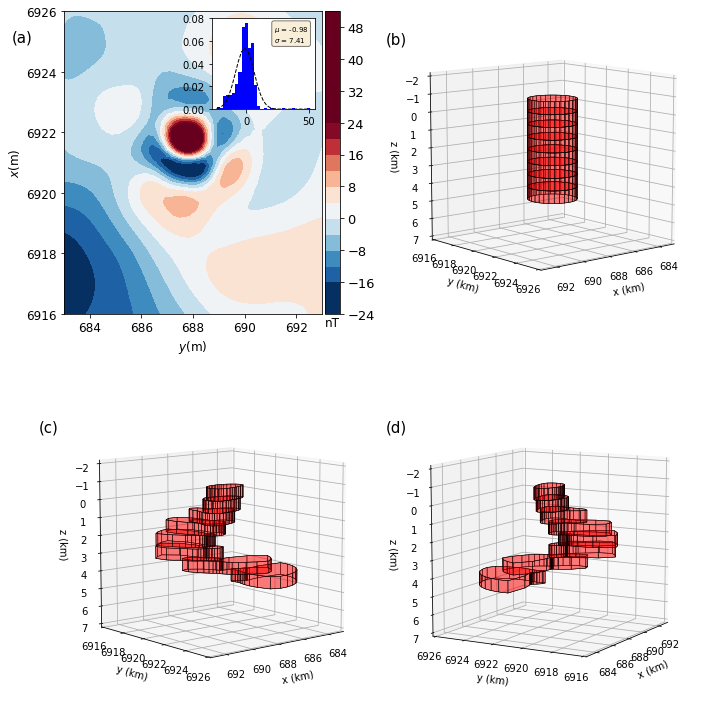

In [22]:
plt.figure(figsize=(10,10))

# residual data and histogram
ax=plt.subplot(2,2,1)
#plt.title('Residual', fontsize=20)
plt.tricontourf(di['y'], di['x'], di['results'][15][5], 20,
                cmap='RdBu_r', vmin=np.min(di['results'][3][5]),
                vmax=np.min(di['results'][15][5])*(-1)).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=12)
plt.ylabel('$x$(m)', fontsize=12)
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT', pad=-315)
mpl.m2km()
clb.ax.tick_params(labelsize=13)
inset = inset_axes(ax, width="40%", height="30%", loc=1, borderpad=0.7)
mean = np.mean(di['results'][15][5])
std = np.std(di['results'][15][5])
nbins=30
n, bins, patches = plt.hist(di['results'][15][5],bins=nbins, normed=True, facecolor='blue')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
inset.text(0.6, 0.95, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(mean, std),
                transform=inset.transAxes, fontsize=7,
            va='top', ha='left', bbox=props)
gauss = sp.norm.pdf(bins, mean, std)
plt.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
ax.text(681000, 6925000, '(a)', fontsize= 15)

# initial approximate
ax = plt.subplot(2,2,2, projection='3d')

# plot sides
# ax.add_collection3d(Poly3DCollection(verts15, alpha=0.3, 
#  facecolor='r', linewidths=0.5, edgecolors='k'))
ax.add_collection3d(Poly3DCollection(verts_initial15, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))

ax.set_ylim(np.min(x), np.max(x), 100)
ax.set_xlim(np.min(y), np.max(y), 100)
ax.set_zlim(7, -2, 100)
ax.tick_params(labelsize= 10)
ax.set_ylabel('y (km)', fontsize= 10)
ax.set_xlabel('x (km)', fontsize= 10)
ax.set_zlabel('z (km)', fontsize= 10)
ax.view_init(10, 50)
ax.text2D(-0.1, 0.07, '(b)', fontsize= 15)

# inverse model view 1
ax = plt.subplot(2,2,3, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts15, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))
# ax.add_collection3d(Poly3DCollection(verts_initial15, alpha=0.1, 
#  facecolor='b', linewidths=0.5, edgecolors='k'))

ax.set_ylim(np.min(x), np.max(x), 100)
ax.set_xlim(np.min(y), np.max(y), 100)
ax.set_zlim(7, -2, 100)
ax.tick_params(labelsize= 10)
ax.set_ylabel('y (km)', fontsize= 10)
ax.set_xlabel('x (km)', fontsize= 10)
ax.set_zlabel('z (km)', fontsize= 10)
ax.view_init(10, 50)
ax.text2D(-0.11, 0.07, '(c)', fontsize= 15)

# inverse model view 2
ax = plt.subplot(2,2,4, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts15, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))
# ax.add_collection3d(Poly3DCollection(verts_initial15, alpha=0.1, 
# facecolor='b', linewidths=0.5, edgecolors='k'))

ax.set_ylim(np.min(x), np.max(x), 100)
ax.set_xlim(np.min(y), np.max(y), 100)
ax.set_zlim(7, -2, 100)
ax.tick_params(labelsize= 10)
ax.set_ylabel('y (km)', fontsize= 10)
ax.set_xlabel('x (km)', fontsize= 10)
ax.set_zlabel('z (km)', fontsize= 10)
ax.view_init(10, -150)
ax.text2D(-0.1, 0.07, '(d)', fontsize= 15)

plt.tight_layout()
#plt.savefig(mypath+'results.png', dpi=300, bbox_inches='tight')
plt.show()

# Inversions 3 and 15

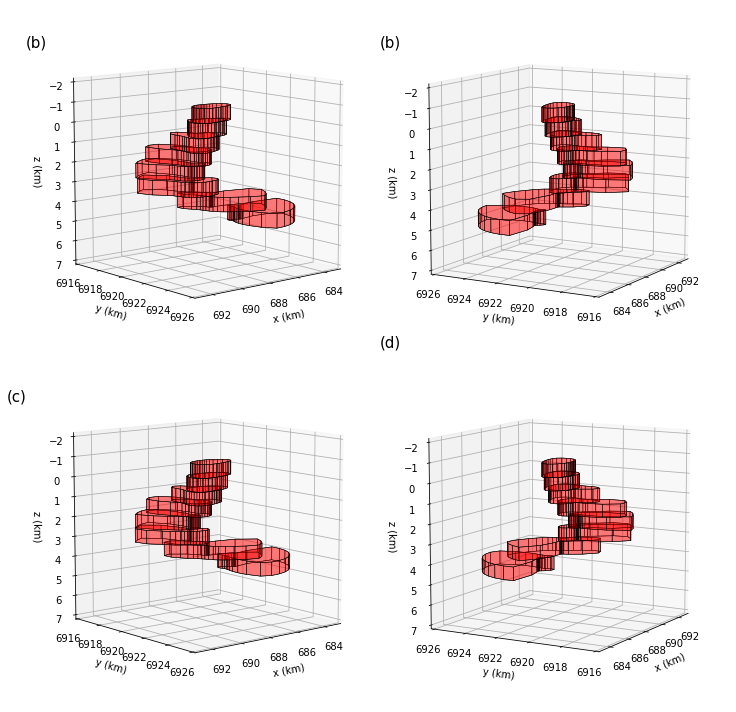

In [23]:
plt.figure(figsize=(10,10))

# initial approximate
ax = plt.subplot(2,2,1, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts3, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))
#ax.add_collection3d(Poly3DCollection(verts_initial3, alpha=0.1, 
# facecolor='b', linewidths=0.5, edgecolors='k'))

ax.set_ylim(np.min(x), np.max(x), 100)
ax.set_xlim(np.min(y), np.max(y), 100)
ax.set_zlim(7, -2, 100)
ax.tick_params(labelsize= 10)
ax.set_ylabel('y (km)', fontsize= 10)
ax.set_xlabel('x (km)', fontsize= 10)
ax.set_zlabel('z (km)', fontsize= 10)
ax.view_init(10, 50)
ax.text2D(-0.1, 0.07, '(b)', fontsize= 15)

# initial approximate
ax = plt.subplot(2,2,2, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts3, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))
#ax.add_collection3d(Poly3DCollection(verts_initial3, alpha=0.1, 
# facecolor='b', linewidths=0.5, edgecolors='k'))

ax.set_ylim(np.min(x), np.max(x), 100)
ax.set_xlim(np.min(y), np.max(y), 100)
ax.set_zlim(7, -2, 100)
ax.tick_params(labelsize= 10)
ax.set_ylabel('y (km)', fontsize= 10)
ax.set_xlabel('x (km)', fontsize= 10)
ax.set_zlabel('z (km)', fontsize= 10)
ax.view_init(10, -150)
ax.text2D(-0.1, 0.07, '(b)', fontsize= 15)

# inverse model view 1
ax = plt.subplot(2,2,3, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts15, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))
# ax.add_collection3d(Poly3DCollection(verts_initial15, alpha=0.1, 
#  facecolor='b', linewidths=0.5, edgecolors='k'))

ax.set_ylim(np.min(x), np.max(x), 100)
ax.set_xlim(np.min(y), np.max(y), 100)
ax.set_zlim(7, -2, 100)
ax.tick_params(labelsize= 10)
ax.set_ylabel('y (km)', fontsize= 10)
ax.set_xlabel('x (km)', fontsize= 10)
ax.set_zlabel('z (km)', fontsize= 10)
ax.view_init(10, 50)
ax.text2D(-0.11, 0.07, '(c)', fontsize= 15)

# inverse model view 2
ax = plt.subplot(2,2,4, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts15, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))
# ax.add_collection3d(Poly3DCollection(verts_initial15, alpha=0.1, 
# facecolor='b', linewidths=0.5, edgecolors='k'))

ax.set_ylim(np.min(x), np.max(x), 100)
ax.set_xlim(np.min(y), np.max(y), 100)
ax.set_zlim(7, -2, 100)
ax.tick_params(labelsize= 10)
ax.set_ylabel('y (km)', fontsize= 10)
ax.set_xlabel('x (km)', fontsize= 10)
ax.set_zlabel('z (km)', fontsize= 10)
ax.view_init(10, -150)
ax.text2D(-0.1, 0.1, '(d)', fontsize= 15)

plt.tight_layout()
#plt.savefig(mypath+'results.png', dpi=300, bbox_inches='tight')
plt.show()

# Calculating the momentum

In [24]:
volume3 = mfun.volume_polygon(di['results'][3][2])
volume15 = mfun.volume_polygon(di['results'][15][2])
momentum3 = volume3*np.linalg.norm(di['results'][3][2][0].props['magnetization'])
momentum15 = volume15*np.linalg.norm(di['results'][15][2][0].props['magnetization'])


In [25]:
volume3

32.050512264777616

In [26]:
volume15

29.998207244500662

In [27]:
momentum3

160.25256132388807

In [28]:
momentum15

149.9910362225033

# Plot all solutions